## Analyze Fiit's Like Study (Line) Data

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.interpolate import UnivariateSpline

sns.set_theme(style = "whitegrid")

In [29]:
_dir = r"DualSensorMouse_Fittslike_RailAngle\Logs"

In [30]:
Try = "1"
UserName = "BMH"

In [31]:
_dirCC = _dir+f"\{UserName}\{Try}"

In [32]:
dirlstWW = os.listdir(_dirCC)

dirlstWW

['BMH_railAngle_010_9']

---

Max Peak at 010_9: 0.587
Mean of Max Peak: 0.587


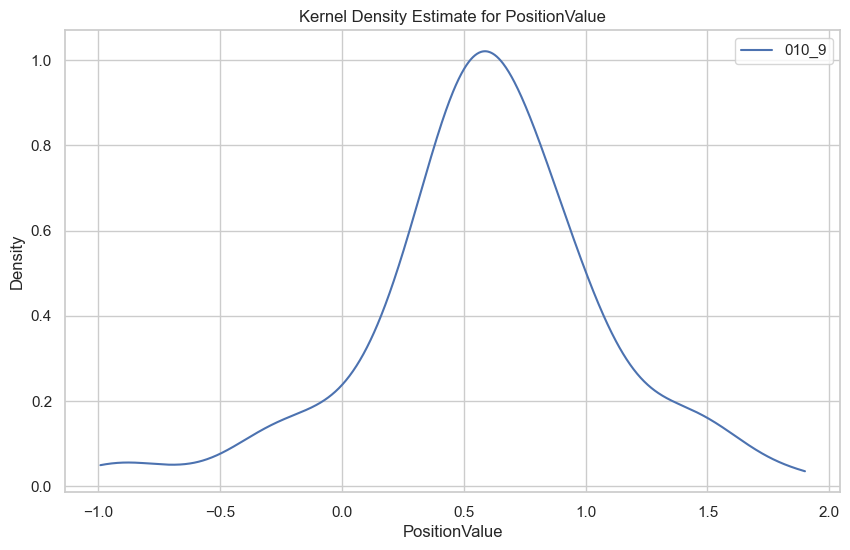

In [33]:
dflstW = [f.path for f in os.scandir(_dirCC) if f.is_dir()]
max_densityV = []

colors = plt.cm.viridis(np.linspace(0, 1, len(dflstW)))

plt.figure(figsize=(10, 6))

for subdir in dflstW:
    subdir_parts = subdir.split('_')
    subdir_info = {
        "User": subdir_parts[2],
        "Type": subdir_parts[3],
        "SenP": subdir_parts[4],
        "Trial": subdir_parts[5]
    }
    subdir_shortened = f"{subdir_info['SenP']}_{subdir_info['Trial']}"
    subdir_path = subdir
    
    subsubdirs = [d for d in os.listdir(subdir_path) if os.path.isdir(os.path.join(subdir_path, d))]
    for subsubdir in subsubdirs:
        subsubdir_path = os.path.join(subdir_path, subsubdir)
        Dirw = os.path.join(subsubdir_path, "Pos_values.csv")

        data = pd.read_csv(Dirw)
        data = data[(data["PositionValue"] >= -1) & (data["PositionValue"] <= 2)]

        kde = gaussian_kde(data["PositionValue"])
        x_values = np.linspace(data["PositionValue"].min(), data["PositionValue"].max(), 1000)
        densities = kde.evaluate(x_values)
        max_density_x = x_values[np.argmax(densities)]
        max_densityV.append(max_density_x)
        print(f"Max Peak at {subdir_shortened}: {max_density_x:.3f}")
        #plt.axvline(x=max_density_x, color='r', linestyle='--', label=f'Max Peak at {max_density_x:.2f}')
        
        plt.plot(x_values, densities, label=subdir_shortened)  # 각 선에 레이블 추가

meanMD = sum(max_densityV) / len(max_densityV)

print(f"Mean of Max Peak: {meanMD:.3f}")

plt.legend()
plt.title('Kernel Density Estimate for PositionValue')
plt.xlabel('PositionValue')
plt.ylabel('Density')
plt.show()

CoM of 010_9: 0.583
CoM of CoMs: 0.583


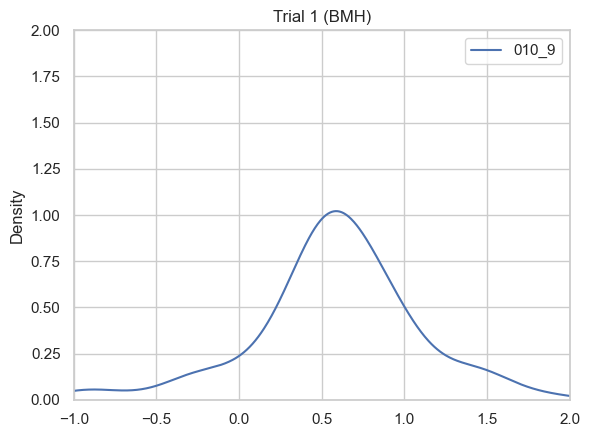

In [34]:
dflstW = []
CoM_values = []

# 각 하위 디렉토리에 대해 또 다른 하위 디렉토리 탐색
for subdir in dirlstWW:
    subdir_parts = subdir.split('_')
    # 필요한 값만 선택하여 저장
    subdir_info = {
        "User": subdir_parts[0],
        "Type": subdir_parts[1],
        "SenP": subdir_parts[2],
        "Trial": subdir_parts[3]
    }
    subdir_shortened = f"{subdir_info['SenP']}_{subdir_info['Trial']}"
    subdir_path = os.path.join(_dirCC, subdir)
    
    # 또 다른 하위 디렉토리 목록 가져오기
    subsubdirs = [d for d in os.listdir(subdir_path) if os.path.isdir(os.path.join(subdir_path, d))]
    # 또 다른 하위 디렉토리에서 Pos_values.csv 파일 찾기
    for subsubdir in subsubdirs:
        subsubdir_path = os.path.join(subdir_path, subsubdir)
        Dirw = os.path.join(subsubdir_path, "Pos_values.csv")
        if os.path.exists(Dirw):
            #if subdir_info["Trial"] == "1":  #통계 조건만 빼서 보고 싶을 때 사용
                dfw = pd.read_csv(Dirw)
                dfw = dfw[(dfw["PositionValue"] >= -1) & (dfw["PositionValue"] <= 2)]
                dflstW.append((dfw, subdir_shortened))  # 수정된 subdir 이름 사용

# 그래프 그리기
for dfw, subdir_shortened in dflstW:
    dfw["PositionValue"].plot.density(label=subdir_shortened)
    
    CoM = dfw["PositionValue"].mean()
    CoM_values.append(CoM)
    
    # CoM 출력
    print(f"CoM of {subdir_shortened}: {CoM:.3f}")

# CoM들의 평균 계산
CCoM = sum(CoM_values) / len(CoM_values)

print(f"CoM of CoMs: {CCoM:.3f}")

plt.legend()
plt.title('Trial '+Try+' ('+UserName+')')
plt.ylim(0, 2.0)
plt.xlim(-1,2)
plt.show()

Max Peak at 010_9 (Count: 1): 5.162
Max Peak at 010_9 (Count: 2): 9.323
Max Peak at 010_9 (Count: 3): 8.583
Max Peak at 010_9 (Count: 4): 14.396
Max Peak at 010_9 (Count: 5): 5.208
Max Peak at 010_9 (Count: 6): 16.678
Max Peak at 010_9 (Count: 7): 7.573
Max Peak at 010_9 (Count: 8): 6.615
Max Peak at 010_9 (Count: 9): 4.588
Max Peak at 010_9 (Count: 10): 5.420
Max Peak at 010_9 (Count: 11): 6.926
Mean of Max Peak: 8.225


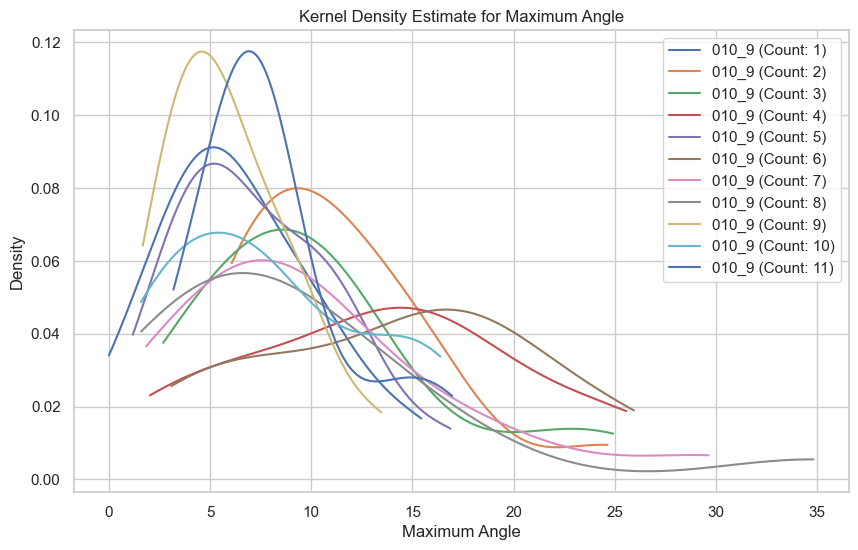

In [45]:
dflstW = [f.path for f in os.scandir(_dirCC) if f.is_dir()]
max_densityV = []

colors = plt.cm.viridis(np.linspace(0, 1, len(dflstW)))

plt.figure(figsize=(10, 6))

for subdir in dflstW:
    subdir_parts = subdir.split('_')
    subdir_info = {
        "User": subdir_parts[2],
        "Type": subdir_parts[3],
        "SenP": subdir_parts[4],
        "Trial": subdir_parts[5]
    }
    subdir_shortened = f"{subdir_info['SenP']}_{subdir_info['Trial']}"
    subdir_path = subdir
    
    subsubdirs = [d for d in os.listdir(subdir_path) if os.path.isdir(os.path.join(subdir_path, d))]
    
    for subsubdir in subsubdirs:
        subsubdir_path = os.path.join(subdir_path, subsubdir)
        Dirw = os.path.join(subsubdir_path, "Pos_values.csv")

        data = pd.read_csv(Dirw)
        
        # 각 Angle 값 중 최댓값을 찾습니다.
        max_angle = data[["Angle1", "Angle2", "Angle3", "Angle4", "Angle5", "Angle6", "Angle7", "Angle8"]].max(axis=1)
        
        # Count 값을 기준으로 데이터를 그룹화합니다.
        grouped_data = data.groupby("Count")
        
        # Count 값마다 그래프를 그립니다.
        for count_value, count_group in grouped_data:
            max_angle_grouped = count_group[["Angle1", "Angle2", "Angle3", "Angle4", "Angle5", "Angle6", "Angle7", "Angle8"]].max(axis=1)
            kde = gaussian_kde(max_angle_grouped)
            x_values = np.linspace(max_angle_grouped.min(), max_angle_grouped.max(), 1000)
            densities = kde.evaluate(x_values)
            max_density_x = x_values[np.argmax(densities)]
            max_densityV.append(max_density_x)
            print(f"Max Peak at {subdir_shortened} (Count: {count_value}): {max_density_x:.3f}")

            plt.plot(x_values, densities, label=f"{subdir_shortened} (Count: {count_value})")  # 각 선에 레이블 추가

meanMD = sum(max_densityV) / len(max_densityV)

print(f"Mean of Max Peak: {meanMD:.3f}")

plt.legend()
plt.title('Kernel Density Estimate for Maximum Angle')
plt.xlabel('Maximum Angle')
plt.ylabel('Density')
plt.show()

Max Peak at 010_9 (Count: 1): 4.654
Max Peak at 010_9 (Count: 2): 10.335
Max Peak at 010_9 (Count: 3): 7.772
Max Peak at 010_9 (Count: 4): 11.516
Max Peak at 010_9 (Count: 5): 17.222
Max Peak at 010_9 (Count: 6): 15.701
Max Peak at 010_9 (Count: 7): 19.954
Max Peak at 010_9 (Count: 8): 9.461
Max Peak at 010_9 (Count: 9): 8.937
Max Peak at 010_9 (Count: 10): 4.837
Max Peak at 010_9 (Count: 11): 5.630
Mean of Max Peak: 10.547


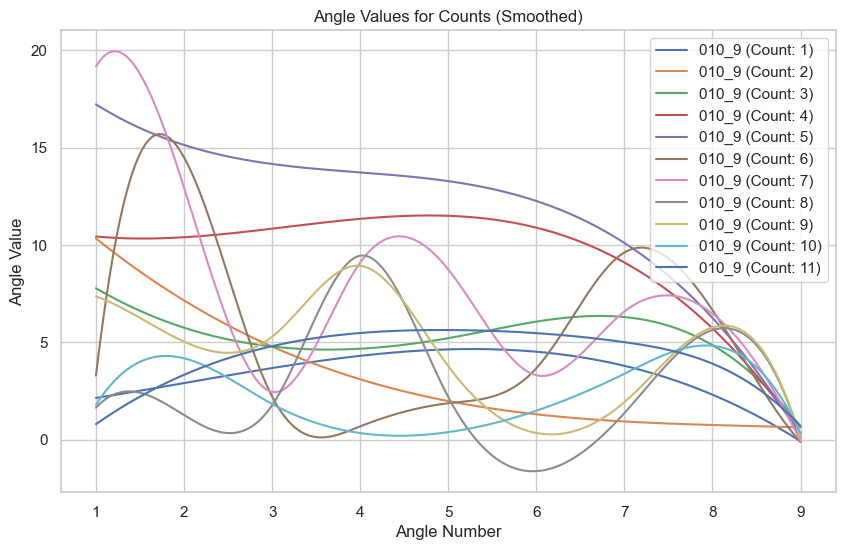

In [44]:
dflstW = [f.path for f in os.scandir(_dirCC) if f.is_dir()]
max_densityV = []

colors = plt.cm.viridis(np.linspace(0, 1, len(dflstW)))

plt.figure(figsize=(10, 6))

for subdir in dflstW:
    subdir_parts = subdir.split('_')
    subdir_info = {
        "User": subdir_parts[2],
        "Type": subdir_parts[3],
        "SenP": subdir_parts[4],
        "Trial": subdir_parts[5]
    }
    subdir_shortened = f"{subdir_info['SenP']}_{subdir_info['Trial']}"
    subdir_path = subdir
    
    subsubdirs = [d for d in os.listdir(subdir_path) if os.path.isdir(os.path.join(subdir_path, d))]
    
    for subsubdir in subsubdirs:
        subsubdir_path = os.path.join(subdir_path, subsubdir)
        Dirw = os.path.join(subsubdir_path, "Pos_values.csv")

        data = pd.read_csv(Dirw)
        
        # Angle 값 중 0이 나왔을 때 이전 값이 0이 아니라면 이전 값으로 대체합니다.
        for angle_column in ["Angle1", "Angle2", "Angle3", "Angle4", "Angle5", "Angle6", "Angle7", "Angle8"]:
            data[angle_column] = data[angle_column].apply(lambda x: x if x != 0 else None).fillna(method='ffill')
        
        # 각 Angle 넘버를 x 값으로, 해당 Angle 값들을 y 값으로 사용하여 그래프를 그립니다.
        for count_value, count_group in data.groupby("Count"):
            x_values = range(1, 10)  # Angle 넘버 값
            y_values = [count_group[f"Angle{angle_number}"].values[-1] if count_group[f"Angle{angle_number}"].values[-1] != 0 else 0 for angle_number in x_values]  # Angle 값
            
            # UnivariateSpline을 사용하여 부드러운 곡선을 생성합니다.
            spline = UnivariateSpline(x_values, y_values)
            x_smooth = np.linspace(min(x_values), max(x_values), 200)
            y_smooth = spline(x_smooth)

            plt.plot(x_smooth, y_smooth, label=f"{subdir_shortened} (Count: {count_value})")  # 각 선에 레이블 추가
            
            # max_densityV 리스트에 값을 추가합니다.
            max_densityV.append(max(y_smooth))
            print(f"Max Peak at {subdir_shortened} (Count: {count_value}): {max(y_smooth):.3f}")

# max_densityV 리스트에 값이 없다면 0으로 처리합니다.
if max_densityV:
    meanMD = sum(max_densityV) / len(max_densityV)
else:
    meanMD = 0

print(f"Mean of Max Peak: {meanMD:.3f}")

plt.legend()
plt.title('Angle Values for Counts (Smoothed)')
plt.xlabel('Angle Number')
plt.ylabel('Angle Value')
plt.show()